In [1]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

## Tokenization and Stemming

In [2]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Select random review and business_id
m = randrange(len(data))
business_id_1 = data[m]['business_id']
business_id_1

'EgwGTDZ705TwudPJwAY0yQ'

In [5]:
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [6]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['this', 'place', 'is', 'quite', 'possibly', 'my', 'favorite', 'restaurant', 'in', 'phoenix', 'my', 'favorites', 'are', 'the', 'chicken', 'scarpariello', 'the', 'pizza', 'and', 'the', 'sangria', 'my', 'wife', 'ca', "n't", 'decide', 'between', 'four', 'dishes', 'our', 'daughter', 'loves', 'the', 'penne', 'ala', 'vodka', 'lasagna', 'or', 'ravioli', 'mario', 'and', 'his', 'sons', 'work', 'hard', 'to', 'please', 'and', 'we', "'ve", 'never', 'had', 'a', 'bad', 'meal', 'here', 'i', "'ve", 'seen', 'them', 'bend', 'over', 'backwards', 'to', 'try', 'and', 'take', 'care', 'of', 'obvious', 'jerks', 'plus', 'to', 'top', 'it', 'off', 'when', 'local', 'school', 'invited', 'local', 'pizza', 'places', 'to', 'present', 'to', 'a', 'class', 'on', 'making', 'pizza', 'and', 'recycling', 'issues', 'mario', 'came', 'and', 'talked', 'to', 'the', 'kids', 'as', 'if', 'they', 'were', 'adults', 'all', 'the', 'other', 'places', 'treated', 'it', 'as', 'a', 'marketing', 'event', 'and', 'brought', 'coupons', 'get', '

In [7]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['thi', 'place', 'is', 'quit', 'possibl', 'my', 'favorit', 'restaur', 'in', 'phoenix', 'my', 'favorit', 'are', 'the', 'chicken', 'scarpariello', 'the', 'pizza', 'and', 'the', 'sangria', 'my', 'wife', 'ca', "n't", 'decid', 'between', 'four', 'dish', 'our', 'daughter', 'love', 'the', 'penn', 'ala', 'vodka', 'lasagna', 'or', 'ravioli', 'mario', 'and', 'hi', 'son', 'work', 'hard', 'to', 'pleas', 'and', 'we', "'ve", 'never', 'had', 'a', 'bad', 'meal', 'here', 'i', "'ve", 'seen', 'them', 'bend', 'over', 'backward', 'to', 'tri', 'and', 'take', 'care', 'of', 'obviou', 'jerk', 'plu', 'to', 'top', 'it', 'off', 'when', 'local', 'school', 'invit', 'local', 'pizza', 'place', 'to', 'present', 'to', 'a', 'class', 'on', 'make', 'pizza', 'and', 'recycl', 'issu', 'mario', 'came', 'and', 'talk', 'to', 'the', 'kid', 'as', 'if', 'they', 'were', 'adult', 'all', 'the', 'other', 'place', 'treat', 'it', 'as', 'a', 'market', 'event', 'and', 'brought', 'coupon', 'get', 'the', 'idea', 'it', "'s", 'all', 'good', '

In [8]:
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

the        7
and        7
to         6
a          3
it         3
          ..
off        1
when       1
school     1
invited    1
here       1
Length: 98, dtype: int64

In [9]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

and        7
the        7
to         6
a          3
place      3
          ..
when       1
school     1
invit      1
present    1
here       1
Length: 96, dtype: int64

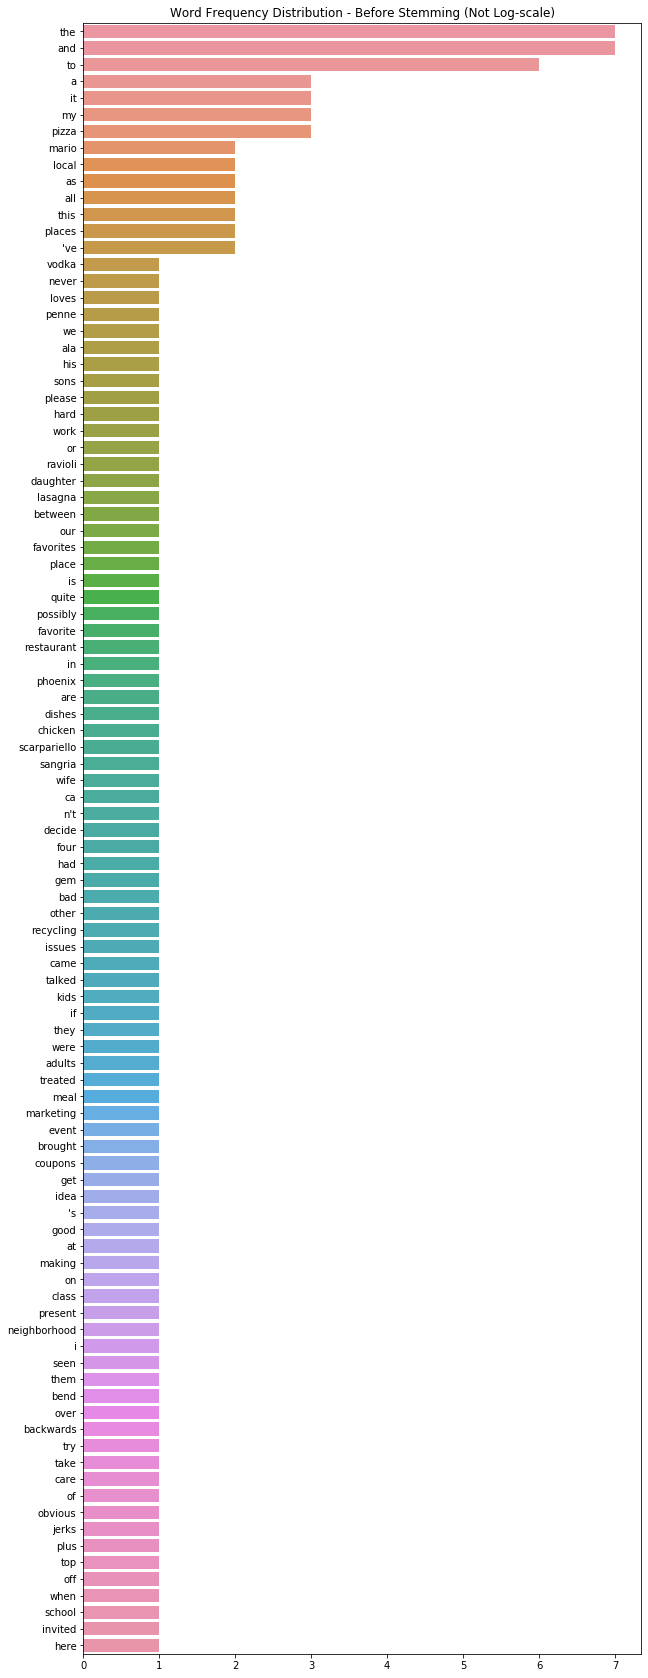

In [10]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

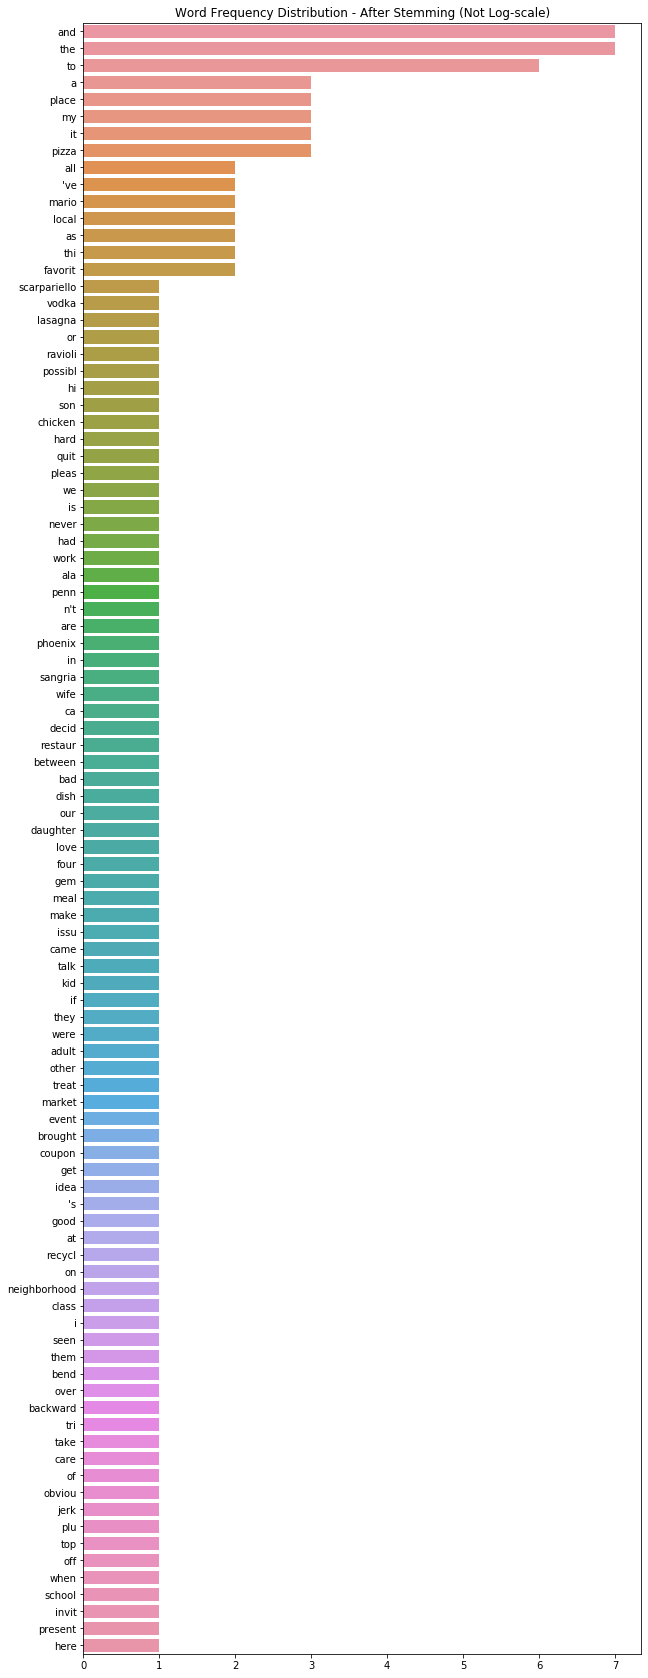

In [11]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

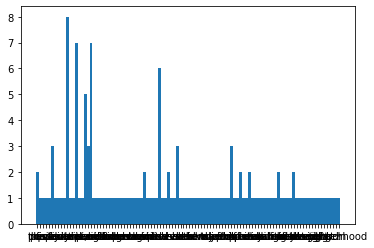

In [12]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

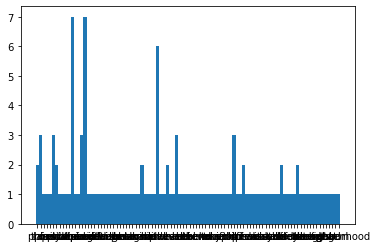

In [13]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [14]:
# Select a second random business
i = randrange(len(data))
business_id_2 = data[i]['business_id']
business_id_2

'qaPSbg690KaX5av6xsSV4Q'

In [15]:
preStem_2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        words = word_tokenize(text)
        preStem_2.extend(words)

In [16]:
filtered_preStem_2 = [w for w in preStem_2 if not w in string.punctuation]
# Stemming
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [17]:
freq_dist_2 = FreqDist(filtered_preStem_2)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)
freq_dist_2

the           3
is            3
rude          2
owner         2
's            2
average       1
have          1
no            1
idea          1
what          1
problem       1
but           1
he            1
incredibly    1
his           1
coffee        1
wife          1
on            1
other         1
hand          1
super         1
nice          1
an            1
odd           1
mix           1
great         1
space         1
and           1
i             1
dtype: int64

In [18]:
stemmed_freq_dist_2 = FreqDist(stems_2)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist_2

the        3
is         3
rude       2
owner      2
's         2
averag     1
have       1
no         1
idea       1
what       1
problem    1
but        1
he         1
incred     1
hi         1
coffe      1
wife       1
on         1
other      1
hand       1
super      1
nice       1
an         1
odd        1
mix        1
great      1
space      1
and        1
i          1
dtype: int64

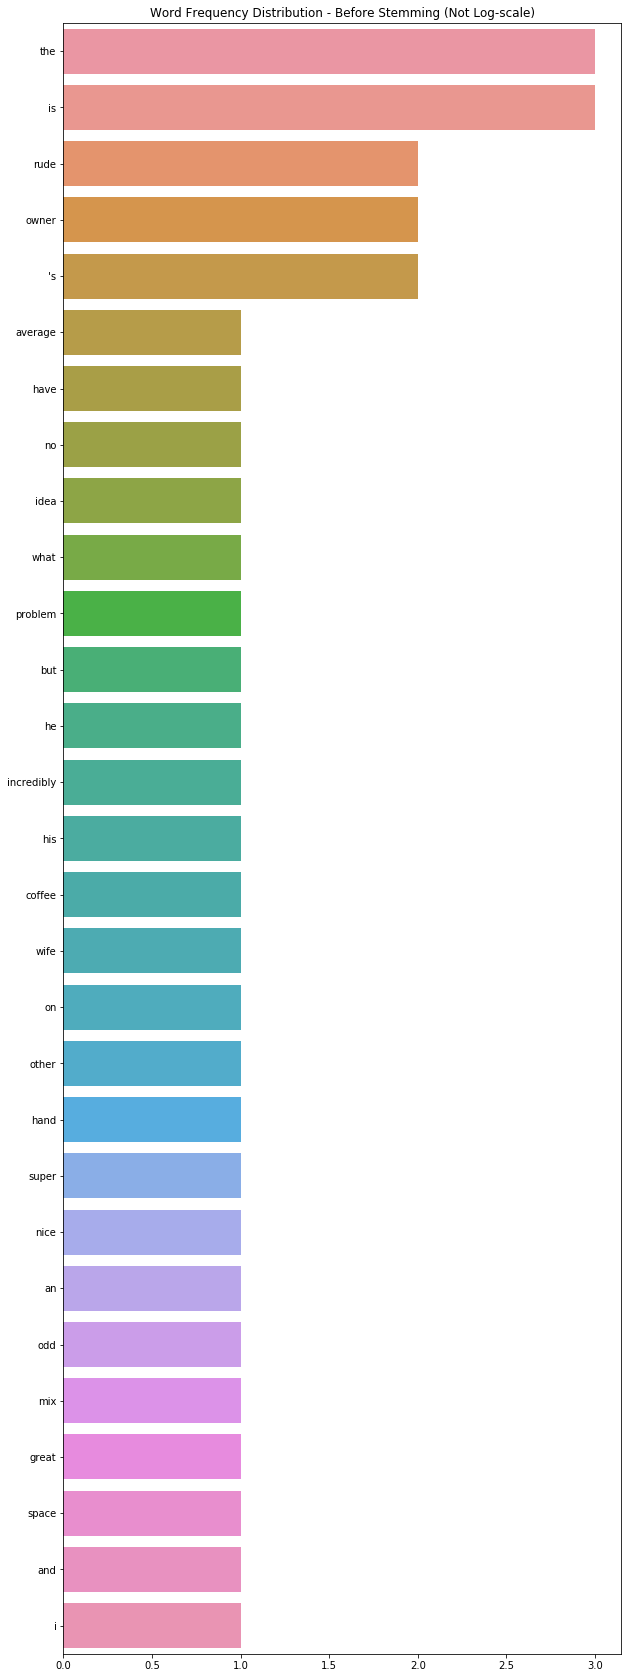

In [19]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist_2.values, y=freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

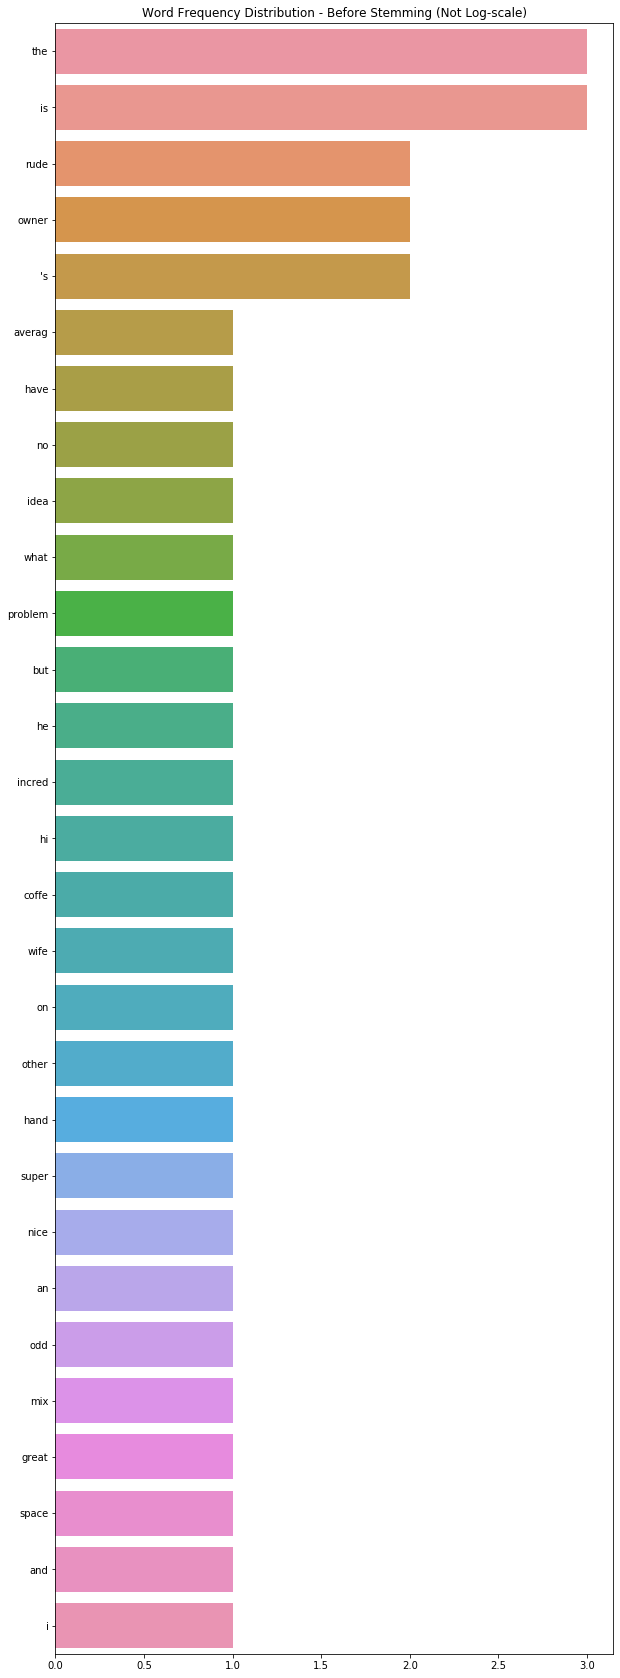

In [20]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist_2.values, y=stemmed_freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

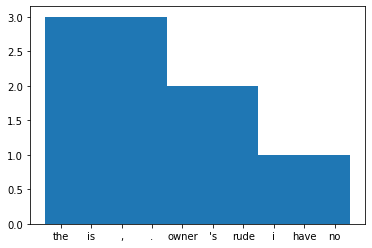

In [21]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

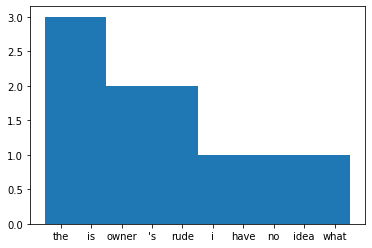

In [22]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

Remove Stopwords - Ideally we want to remove stopwords before stemming

In [23]:
sw = stopwords.words('english')

In [24]:
# Business id 1
# Remove stop words
filtered_preStem = [w for w in filtered_preStem if not w in sw]
stems = [ps.stem(w) for w in filtered_preStem]

In [25]:
freq_dist = FreqDist(filtered_preStem).most_common(10)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)

In [26]:
stemmed_freq_dist = FreqDist(stems).most_common(10)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)

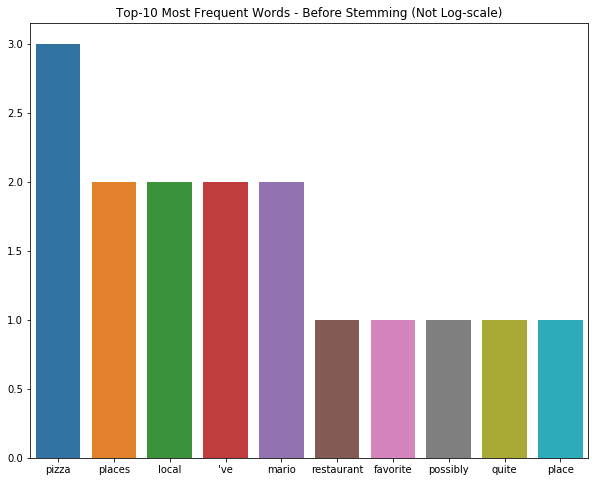

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

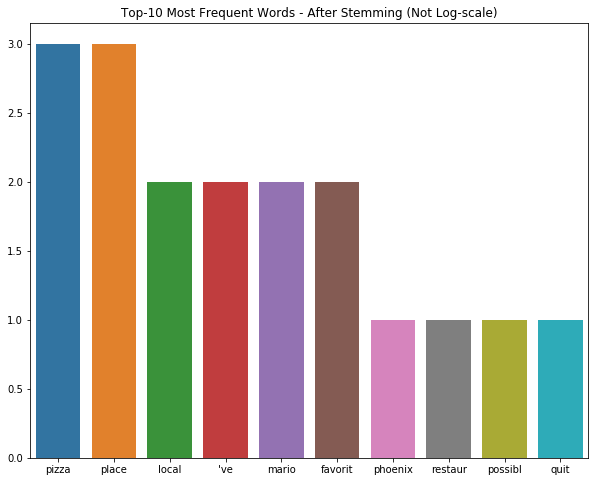

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist.index, y=stemmed_freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - After Stemming (Not Log-scale)")
plt.show()

In [29]:
# Repeat for business id 2
# Remove stop words
filtered_preStem_2 = [w for w in filtered_preStem_2 if not w in sw]
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [30]:
freq_dist_2 = FreqDist(filtered_preStem_2).most_common(10)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)

In [31]:
stemmed_freq_dist_2 = FreqDist(stems_2).most_common(10)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)

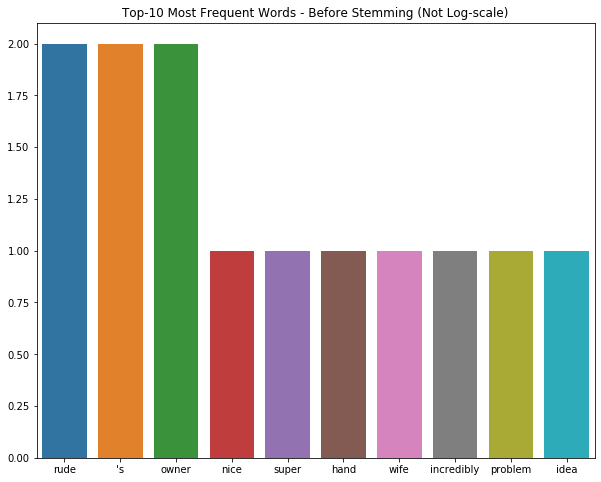

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist_2.index, y=freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

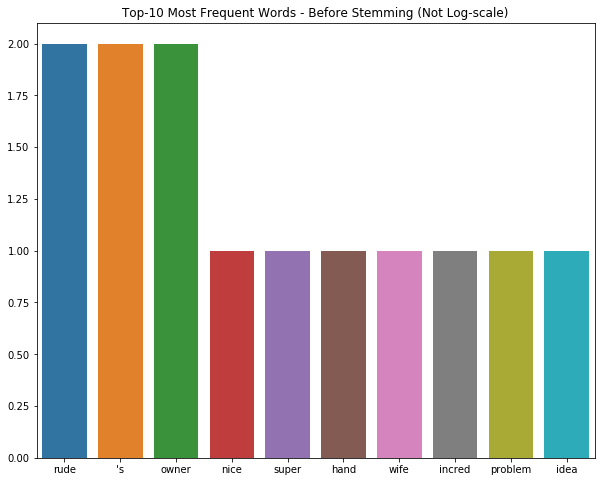

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist_2.index, y=stemmed_freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

## POS Tagging

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

["I'll be the first to admit that I was not excited about going to La Tavolta.", 'Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.', 'Im also not big on ordering pasta when I go out.', 'Alas, I was outnumbered.', 'Thank goodness!', 'I ordered the sea bass special.', 'It was to die for.', 'Cooked perfectly, seasoned perfectly, perfect portion.', 'I can not say enough good things about this dish.', 'When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?"', 'She does.', 'My hubby got the crab tortellini and also loved his.', 'I heard "mmmm this is so good" from all around the table.', 'Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant.', "Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversa

In [36]:
nlp = spacy.load("en_core_web_sm")

In [37]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [38]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

Sentence 1: 
Word            NLTK POS Tag    REGREX POS TAG  spaCy POS TAG  
The             DT              NN              DT             
wings           NNS             NNS             NNS            
,               ,               NN              ,              
brisket         NN              NN              NNP            
,               ,               NN              ,              
and             CC              NN              CC             
mac             NN              NN              NNP            
and             CC              NN              CC             
cheese          NN              NN              NN             
were            VBD             NN              VBD            
alright         VBN             NN              UH             
at              IN              NN              IN             
best            JJS             NN              JJS            
.               .               NN              .              

Sentence 2: 
Word         

## Writing Style

In [39]:
# returns (number of non capitalised proper nouns, total number of proper nouns)
def checkProperNounCapitalised(text, nlp):
    count = 0
    not_capitalised = 0
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "PROPN":
            count += 1
            if not token.text[0].isupper():
                not_capitalised += 1
    return (not_capitalised, count)

In [40]:
def checkFirstWordCapitalised(text):
    count = 0
    sentences = nltk.tokenize.sent_tokenize(text)
    for sentence in sentences:
        if not sentence[0].isupper():
            count += 1
    return (count, len(sentences))

In [48]:
def q3_stem(text):
    overflow_prestem = []
    word = word_tokenize(text)
    overflow_prestem.extend(word)
    filtered_overflow_preStem = [w for w in overflow_prestem if not w in string.punctuation]
    print(filtered_overflow_preStem)

In [1]:
import requests
from bs4 import BeautifulSoup

# scrape post from Stackoverflow
def scrape_text_stackoverflow(website):
    site = requests.get(website)
        
    content = BeautifulSoup(site.content, 'html.parser')
    questions = content.select('div.s-prose.js-post-body')
    return questions[0].text

# scrape post from CNA
def scrape_text_CNA(website):
    site = requests.get(website)
    
    content = BeautifulSoup(site.content, 'html.parser')
    post = content.select('div.text-long p')
    print(post)
    return post


In [5]:
cna = "https://www.channelnewsasia.com/singapore/maid-salary-not-paid-employer-charged-mom-2196361"
output = scrape_text_CNA(cna)
len(output)

[<p>SINGAPORE: A woman who allegedly did not pay her former domestic worker's salary for a year has been charged, the Ministry of Manpower (MOM) said on Thursday (Sep 23).</p>, <p>Santa Maria Michelle Theresa, 56, is accused of not paying her maid's salary from April 2018 to April 2019.</p>, <p>She faces 13 charges under the Employment of Foreign Manpower Act. If found guilty, she could be jailed for up to a year, fined up to S$10,000, or face both penalties for each charge.</p>, <p>The helper, Emferatriz Borja Montefolka, is also suspected of illegally working part-time at the residence of another employer from August 2018 to April 2019.</p>, <p>The 43-year-old has been charged with working without a valid work pass. She could be jailed up to two years, fined up to S$20,000 or both if convicted.</p>, <p>The woman suspected of illegally employing her, Norliza Kamardin, has been charged with employing a migrant domestic worker without a valid work pass.</p>, <p>She could be jailed for u

9

In [8]:
# articles:
# CNA: https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496
# CNA: https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091
# Stackoverflow: https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function
# Stackoverflow: https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t
# HardwareZone: https://forums.hardwarezone.com.sg/threads/amazon-kindle-paperwhite-announced.3885981/
# HardwareZone: https://forums.hardwarezone.com.sg/threads/future-of-kinokuniya-seems-challenging.5396156/


# Scrapping + Stemming (Stackoverflow)
#text = scrape_text_stackoverflow('https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function')
#print("stackoverflow article: flutter app and woocommerce integration add to cart function")
#q3_stem(text)

print("CNA Article: School counselling challenge safeguard student mental health")
CNA_student = scrape_text_CNA('https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496')
#q3_stem(CNA_student)
len(CNA_student)

CNA Article: School counselling challenge safeguard student mental health
[<p><em>* denotes name changed to protect the person’s identity</em></p>, <p>SINGAPORE: When Jane* opened up to her secondary school counsellor about the cold wars and troubles she was having with some close friends, she was told that “life’s like that”.</p>, <p>That was the then 14-year-old’s first session.</p>, <p>“I felt ignored, like (school counselling is hopeless) even if I bring up my problems,” said Jane, now 17 and in her first year at junior college.</p>, <p>She had been “mandated” to attend counselling because she was frequently late for class and did not submit homework on time. She recalled her form teacher telling her outside the classroom, in full view and within earshot of her classmates, that a session had been arranged to address her tardiness.</p>, <p>“It brings the idea that those who aren’t faring well have some problems and need to see the counsellor, rather than (the idea that) people … wan

185

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating

In [ ]:
with open('reviewSelected100.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [ ]:
unique_businesses = set()
for review in data:
    unique_businesses.add(review['business_id'])
print("Number of businesses: " + str(len(unique_businesses)))

In [ ]:
# TBC: might use inverted index
def extractUniqueReviews(rating, amount, data, unique_businesses):
    count = 0
    business_set = set()
    while (count < amount):
        pass

In [ ]:
def getNounAdjectivePairs(review_text, nlp):
    results = []
    sentences = nltk.tokenize.sent_tokenize(review_text)
    for sentence in sentences:
        doc = nlp(sentence)
        for i, token in enumerate(doc):
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
                for j in range(len(doc)):
                    if doc[j].pos_ == 'ADJ':
                        results.append((token, doc[j]))
    return results
    
s = 'Mark and John are sincere employees at Google. The food is very nice and delicious'
print(getNounAdjectivePairs(s, nlp))